# Get_Child Mind Institute

The goal of this competition is to predict from this data a participant's **Severity Impairment Index** (`sii`), a standard measure of problematic internet use.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


## Load Data

In [ ]:
train_id = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/data_dictionary.csv')
train_id.columns

In [ ]:
train_id[['Instrument']].value_counts()

In [ ]:
train = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv')
test = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/test.csv')

In [ ]:
train.info()

In [ ]:
lst_features = list(set(train.columns.tolist()) - set(test.columns.tolist()))
lst_features.remove('sii')

Parent-Child Internet Addiction Test are in train data and aren't in test data

In [ ]:
set(train.columns.tolist()) - set(test.columns.tolist())

In [ ]:
test.head()

## Sample a test set: PCIAT variables

In [1]:
train.info()
train.iloc[:, [75, 81]].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

,PCIAT-PCIAT_Total,sii
0,55.0,2.0
1,0.0,0.0
2,28.0,0.0
3,44.0,1.0
4,NaN,NaN


# Explore the data

In [ ]:
train_ex = train.copy()
test_ex = test.copy()

In [16]:
object_cols_tr = [col for col in train.columns if train[col].dtype == "object"]
features_ex = train.columns.tolist()

object_cols_te = [col for col in test.columns if test[col].dtype == "object"]
features_te = test.columns.tolist()



## Study each attribute: % of missing values.

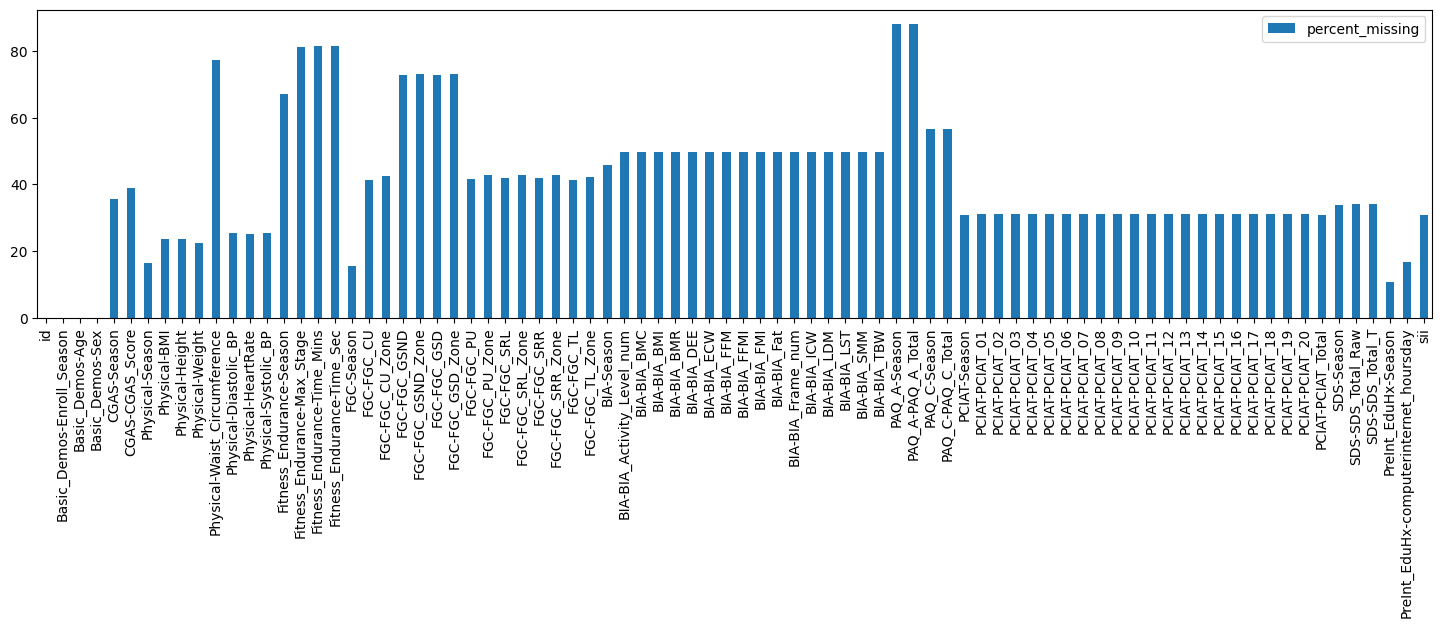

In [21]:
percent_missing = train_ex.isnull().sum() * 100 / len(train_ex)
missing_value_df = pd.DataFrame({'column_name': train_ex.columns, 'percent_missing': percent_missing})
ax = missing_value_df.plot.bar(figsize=(18, 4))
#presents categorical data
#missing_value_df.sort_values(by=['percent_missing'],  ascending=False).plot.bar(figsize=(18, 4))
ax.figure.savefig('train_missing.jpg', dpi=300)

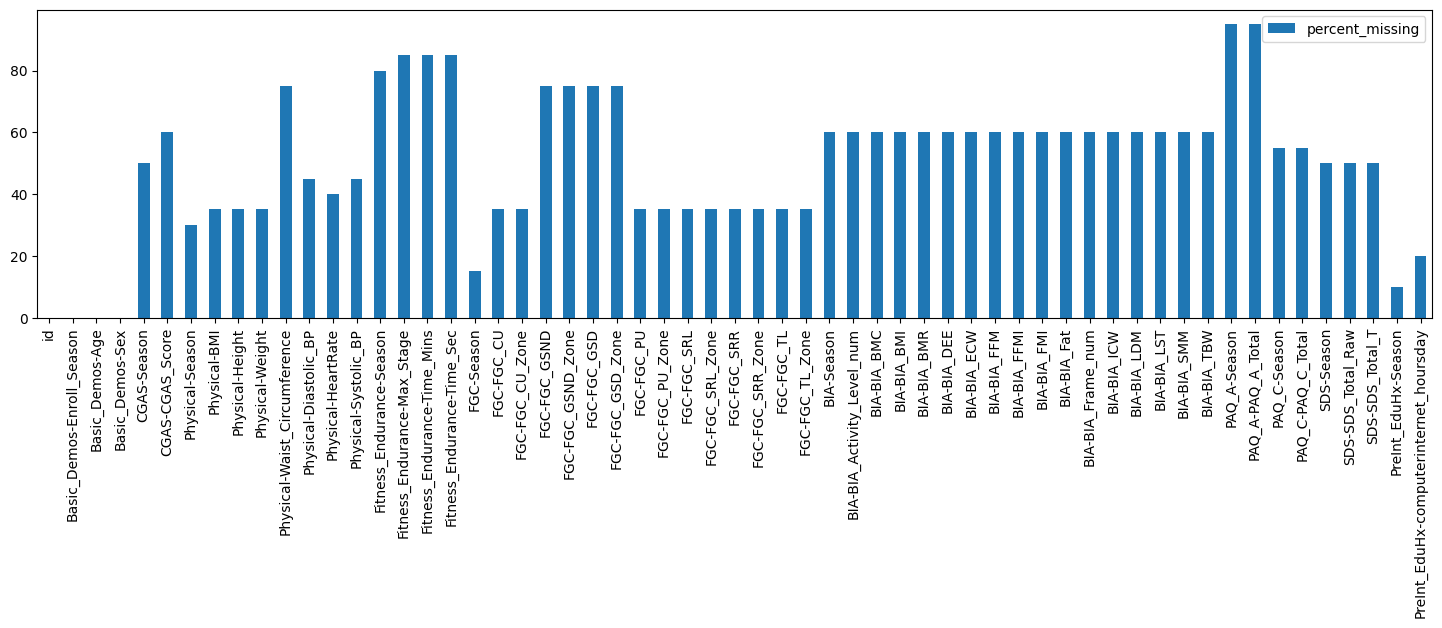

In [24]:
percent_missing = test.isnull().sum() * 100 / len(test)
missing_value_df = pd.DataFrame({'column_name': test.columns, 'percent_missing': percent_missing})
ax = missing_value_df.plot.bar(figsize=(18, 4))

#presents categorical data
#missing_value_df.sort_values(by=['percent_missing'],  ascending=False).plot.bar(figsize=(18, 4))
#fig = plot.get_figure()
ax.figure.savefig('test_missing.jpg', dpi=300)

In [ ]:
df = pd.DataFrame( np.random.randint(1, 7, 6000), columns = ['one'])
df['two'] = df['one'] + np.random.randint(1, 7, 6000)
ax = df.plot.hist(bins=12, alpha=0.5)


<Axes: >

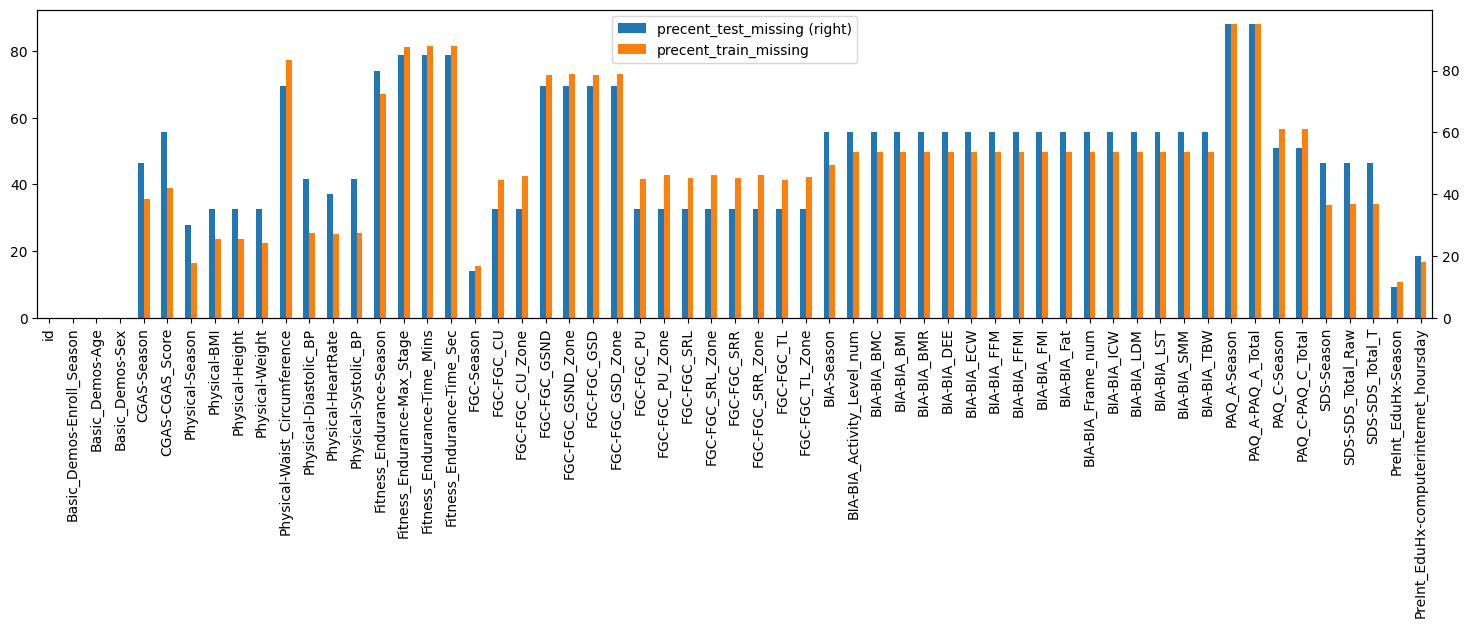

In [12]:
train_ex_tmp = train_ex.drop(columns=list(set(train.columns.tolist()) - set(test.columns.tolist())))

percent_missing_train_ex_tmp = train_ex_tmp.isnull().sum() * 100 / len(train_ex_tmp)

percent_missing_test = test.isnull().sum() * 100 / len(test)
missing_value_df = pd.DataFrame({'column_name': test.columns, 'precent_test_missing': percent_missing_test})
missing_value_df['precent_train_missing'] = percent_missing_train_ex_tmp.values

missing_value_df.plot.bar(figsize=(18, 4), secondary_y= 'precent_test_missing')

 ### Noisiness and type of noise: outliers

Explore precent of object features and how many categorical values have it. All categorical have seasons. Only four values. 

In [ ]:
# % of missing values in object cols
percent_missing = train_ex[object_cols_tr].isnull().sum() * 100 / len(train_ex[object_cols_tr])
missing_value_df = pd.DataFrame({'column_name': train_ex[object_cols_tr].columns, 'percent_missing': percent_missing})
missing_value_df.sort_values(by=['percent_missing'],  ascending=False).plot.bar(figsize=(18, 4))

In [ ]:
#Count number of rows with each unique value of object to reduce Encode categorical features
train_ex['PreInt_EduHx-Season'].value_counts()

## Encode categorical features as an integer array.
For tree-based models (like decision trees and random forests), you can expect ordinal encoding to work well with ordinal variables

In [47]:
set(object_cols_tr) - set(object_cols_te)
set(features_te_sii) - set(features_te) 
#list(set(train.columns.tolist()) - set(test.columns.tolist()))
object_cols_tr.index('PCIAT-Season')

9

In [48]:
from sklearn.preprocessing import OrdinalEncoder
# Make copy to avoid changing original data 
label_train_ex = train_ex.copy()
label_test_ex = test_ex.copy()

features_te_sii = features_te.copy()
features_te_sii.append('sii')


label_train_ex = label_train_ex[features_te_sii]
label_test_ex = label_test_ex[features_te]
# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label_train_ex[features_te_sii] = ordinal_encoder.fit_transform(train_ex[features_te_sii])
label_train_ex[features_te_sii].head()

label_test_ex[object_cols_te] = ordinal_encoder.fit_transform(test_ex[object_cols_te])
label_test_ex[object_cols_te].head()

Check outputs before and after of encode categorical features as an integer array

In [ ]:
percent_missing = train_ex.isnull().sum() * 100 / len(train_ex)
df_tmp = pd.DataFrame({'column_name': train_ex.columns, 'percent_missing': percent_missing})
feat_tmp = df_tmp[df_tmp.percent_missing < 20]['column_name'].tolist()
train_ex[feat_tmp].head()

In [ ]:
percent_missing = label_train_ex.isnull().sum() * 100 / len(label_train_ex)
df_tmp = pd.DataFrame({'column_name': label_train_ex.columns, 'percent_missing': percent_missing})
feat_tmp = df_tmp[df_tmp.percent_missing < 20]['column_name'].tolist()
label_train_ex[feat_tmp].head()

## Study each attribute: Outliers

## Correlations between attributes.
### All attributes 

In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(14,28))
plt.suptitle('Frequency of attributes in train')
for i, col in enumerate(features_ex):
    plt.subplot(14,6,i+1)
    ax1 = label_train_ex[col].plot.box()
    plt.grid()
    plt.tight_layout()

In [ ]:
features_ex_corr = features_ex.copy()
features_ex_corr.remove('id')

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(28, 16))
# https://www.kaggle.com/code/sergiosaharovskiy/ps-s3e11-2023-eda-and-submission?scriptVersionId=123851844&cellId=26
corr = label_train_ex[features_ex].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1,
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 annot=False)
ax.set_title('Title')
plt.tight_layout()
plt.show()
#fig.savefig('figure.jpg')

### PCIAT Attributes

In [ ]:
label_train_ex.info()

In [46]:
#concat([df1,df2], axis=1)
df_PCIA_att = pd.concat([label_train_ex.loc[:,'PCIAT-PCIAT_01':'PCIAT-PCIAT_20'],label_train_ex.iloc[:, [54,75, 81]]], axis=1)

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(28, 16))
# https://www.kaggle.com/code/sergiosaharovskiy/ps-s3e11-2023-eda-and-submission?scriptVersionId=123851844&cellId=26
corr = df_PCIA_att.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1,
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 annot=True)
ax.set_title('sii vs 20 PCIAT-PCiAT-xx vs PCIAT-total')
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(28, 16))
# https://www.kaggle.com/code/sergiosaharovskiy/ps-s3e11-2023-eda-and-submission?scriptVersionId=123851844&cellId=26
corr = label_train_ex.loc[:,'PCIAT-PCIAT_01':'PCIAT-PCIAT_20'].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1,
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 annot=False)
ax.set_title('Title')
plt.tight_layout()
plt.show()

# Prepare the data 
## Data cleaning: Fill in missing values

In [49]:
train_pr = label_train_ex.copy()
test_pr = label_test_ex.copy()

In [ ]:
train_pr.info()

### A Better Option: Imputation
Fills in the missing values with some number

In [50]:
from sklearn.impute import SimpleImputer
# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(train_pr))
imputed_X_train.columns = train_pr.columns

imputed_X_test = pd.DataFrame(my_imputer.fit_transform(test_pr))
imputed_X_test.columns = test_pr.columns

In [63]:
set(train_pr.columns.to_list()) - set(test_pr.columns.to_list())

{'sii'}

### An Extension To Imputation
We impute the missing values, as before. And, additionally, for each column with missing entries in the original dataset, we add a new column that shows the location of the imputed entries

In [51]:
# Get names of columns with missing values
cols_with_missing_tr = [col for col in train_pr.columns
                     if train_pr[col].isnull().any()]

cols_with_missing_te = [col for col in test_pr.columns
                     if test_pr[col].isnull().any()]

In [64]:
set(cols_with_missing_tr) - set(cols_with_missing_te)

{'sii'}

In [52]:
train_pr_plus = train_pr.copy()
test_pr_plus = test_pr.copy()

In [65]:
# Make new columns indicating what will be imputed
for col in cols_with_missing_tr: #See code of ‘A Simple Option’
    train_pr_plus[col + '_was_missing'] = train_pr_plus[col].isnull()

for col in cols_with_missing_te: #See code of ‘A Simple Option’
    test_pr_plus[col + '_was_missing'] = test_pr_plus[col].isnull()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW_was_missing,PAQ_A-Season_was_missing,PAQ_A-PAQ_A_Total_was_missing,PAQ_C-Season_was_missing,PAQ_C-PAQ_C_Total_was_missing,SDS-Season_was_missing,SDS-SDS_Total_Raw_was_missing,SDS-SDS_Total_T_was_missing,PreInt_EduHx-Season_was_missing,PreInt_EduHx-computerinternet_hoursday_was_missing
0,0.0,0.0,5,0,3.0,51.0,0.0,16.877316,46.00,50.8,...,False,True,True,True,True,True,True,True,False,False
1,1.0,2.0,9,0,NaN,NaN,0.0,14.035590,48.00,46.0,...,False,True,True,False,False,False,False,False,False,False
2,2.0,2.0,10,1,0.0,71.0,0.0,16.648696,56.50,75.6,...,True,True,True,False,False,False,False,False,False,False
3,3.0,3.0,9,0,0.0,71.0,2.0,18.292347,56.00,81.6,...,False,True,True,False,False,False,False,False,False,False
4,4.0,1.0,18,1,2.0,NaN,NaN,NaN,NaN,NaN,...,True,False,False,True,True,True,True,True,True,True
5,5.0,1.0,13,1,3.0,50.0,2.0,22.279952,59.50,112.2,...,False,True,True,False,False,False,False,False,False,False
6,6.0,0.0,10,0,NaN,NaN,0.0,19.660760,55.00,84.6,...,False,True,True,False,False,False,False,False,False,False
7,7.0,0.0,10,1,NaN,NaN,0.0,16.861286,59.25,84.2,...,False,True,True,False,False,True,True,True,False,False
8,8.0,2.0,15,0,NaN,NaN,1.0,NaN,NaN,NaN,...,True,True,True,True,True,True,True,True,False,False
9,9.0,2.0,19,1,2.0,NaN,NaN,NaN,NaN,NaN,...,True,True,True,True,True,True,True,True,True,True


In [66]:
set(train_pr_plus.columns.to_list()) - set(test_pr_plus.columns.to_list())

{'sii', 'sii_was_missing'}

In [67]:
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(train_pr_plus))
imputed_X_train_plus.columns = train_pr_plus.columns

imputed_X_test_plus = pd.DataFrame(my_imputer.fit_transform(test_pr_plus))
imputed_X_test_plus.columns = test_pr_plus.columns

In [43]:
imputed_X_train_plus.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PAQ_A-PAQ_A_Total_was_missing,PAQ_C-Season_was_missing,PAQ_C-PAQ_C_Total_was_missing,SDS-Season_was_missing,SDS-SDS_Total_Raw_was_missing,SDS-SDS_Total_T_was_missing,PreInt_EduHx-Season_was_missing,PreInt_EduHx-computerinternet_hoursday_was_missing,sii_was_missing,PCIAT-Season_was_missing
0,0.0,0.0,5.0,0.0,3.000000,51.000000,0.000000,16.877316,46.000000,50.800000,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1.0,2.0,9.0,0.0,1.452055,65.454771,0.000000,14.035590,48.000000,46.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,2.0,10.0,1.0,0.000000,71.000000,0.000000,16.648696,56.500000,75.600000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,3.0,9.0,0.0,0.000000,71.000000,2.000000,18.292347,56.000000,81.600000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,1.0,18.0,1.0,2.000000,65.454771,1.487311,19.331929,55.946713,89.038615,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# Explore many different models/classifiers
## Train many quick and dirty

In [ ]:
set(train_pr_plus.columns.to_list()) - set(test_pr_plus.columns.to_list())

In [69]:
set(train_mo.columns.to_list()) - set(test_mo.columns.to_list())

{'sii', 'sii_was_missing'}

In [70]:
train_mo = imputed_X_train_plus.copy()
test_mo = imputed_X_test_plus.copy()

In [89]:
train_mo_no_miss = train_mo[train_mo.sii_was_missing == 0].drop(columns=['sii_was_missing'])

In [90]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(train_mo_no_miss, test_size=0.2, random_state=42)

In [91]:
y_tr = train_set.sii
y_va = test_set[['sii']]
#X_tr = train_set.drop(columns=features_te)
#X_va = test_set.drop(columns=features_te)


X_tr = train_set.drop(columns=['sii'])
X_va = test_set.drop(columns=['sii'])


In [92]:
from sklearn.metrics import cohen_kappa_score
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent").fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = dummy_clf.predict(X_va.to_numpy())
dummy_score = cohen_kappa_score(y_va.sii.to_numpy(), y_pred, weights = "quadratic")

In [93]:
from sklearn.linear_model import LogisticRegression
logit_clf = LogisticRegression().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = logit_clf.predict(X_va.to_numpy())
logit_score = cohen_kappa_score(y_va.sii.to_numpy(), y_pred, weights = "quadratic")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [94]:
from sklearn.linear_model import RidgeClassifier
ridge_clf = RidgeClassifier().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = ridge_clf.predict(X_va.to_numpy())
ridge_score = cohen_kappa_score(y_va.sii.to_numpy(), y_pred, weights = "quadratic")

In [95]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = sgd_clf.predict(X_va.to_numpy())
sgd_score = cohen_kappa_score(y_va.sii.to_numpy(), y_pred, weights = "quadratic")

In [96]:
from sklearn.svm import SVC
svc_clf = SVC().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = svc_clf.predict(X_va.to_numpy())
svc_score = cohen_kappa_score(y_va.sii.to_numpy(), y_pred, weights = "quadratic")

In [97]:
bayes_score = 0
# ValueError: Negative values in data passed to MultinomialNB (input X)
from sklearn.naive_bayes import MultinomialNB
bayes_clf = MultinomialNB().fit(X_tr.to_numpy(), y_tr.to_numpy())
#y_pred = bayes_clf.predict(X_va.to_numpy())
#bayes_score = cohen_kappa_score(y_va.sii.to_numpy(), y_pred, weights = "quadratic")


In [98]:
from sklearn.neighbors import KNeighborsClassifier
neigh_clf = KNeighborsClassifier().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = neigh_clf.predict(X_va.to_numpy())
neigh_score = cohen_kappa_score(y_va.sii.to_numpy(), y_pred, weights = "quadratic")

In [99]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = tree_clf.predict(X_va.to_numpy())
tree_score = cohen_kappa_score(y_va.sii.to_numpy(), y_pred, weights = "quadratic")

In [100]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = rnd_clf.predict(X_va.to_numpy())
rnd_score = cohen_kappa_score(y_va.sii.to_numpy(), y_pred, weights = "quadratic")

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = gb_clf.predict(X_va.to_numpy())
gb_score = cohen_kappa_score(y_va.sii.to_numpy(), y_pred, weights = "quadratic")

In [102]:
lst_cohen_kappa_score = [bayes_score, dummy_score, gb_score, logit_score, neigh_score, ridge_score, rnd_score, sgd_score, svc_score, tree_score]
lst_name_clf = ['bayes', 'dummy', 'gb', 'logit', 'neigh', 'ridge', 'rnd', 'sgd', 'svc', 'tree' ]


df_scores = pd.DataFrame({
"name_clf" : lst_name_clf,
"cohen_kappa_score" : lst_cohen_kappa_score
})


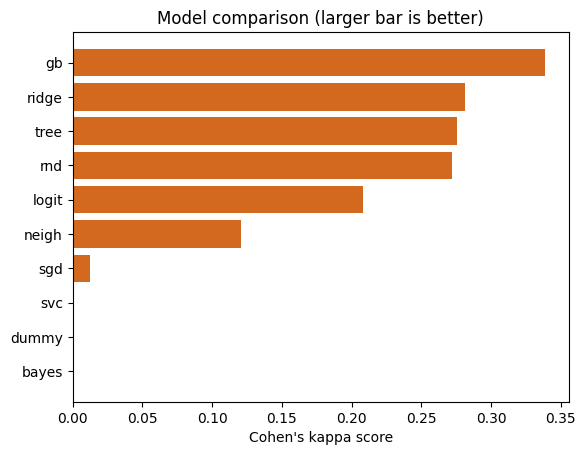

In [103]:
df_scores.sort_values('cohen_kappa_score', ascending=True, inplace=True)
plt.barh(np.arange(len(lst_name_clf)), df_scores.cohen_kappa_score, color='chocolate')
plt.yticks(np.arange(len(lst_name_clf)), df_scores.name_clf)
#plt.xlim(0, 1.2)
plt.title('Model comparison (larger bar is better)')
plt.xlabel('Cohen\'s kappa score')
plt.show()


# Present the solution
## Submission

In [104]:
X_vast = test_mo.drop(['id'],axis=1)

In [107]:
y_pred_tree = tree_clf.predict(test_mo.to_numpy())
y_pred_tree = y_pred_tree.argmax(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])